In [81]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import imblearn

import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [82]:
import pandas as pd
import glob
import os

# Specify the path to the folder containing CSV files
folder_path = 'FeaturesDataset\CombinedDataset'

# Use glob to find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Read and concatenate all CSV files into a single DataFrame
dfs = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dfs, ignore_index=True)

# Print the combined DataFrame
print(combined_df)
data=combined_df


     Unnamed: 0  ch0_mav  ch0_wl    ch0_rms     ch0_var  ch1_mav  ch1_wl  \
0             0   39.872     170  41.624128  142.791616   64.764     283   
1             1   43.264     192  47.702243  403.730304   72.144     320   
2             2   53.884     219  56.349658  271.798544   91.720     383   
3             3   52.204     201  54.833530  281.458384  113.716     509   
4             4   42.496     179  44.821423  203.049984   81.276     408   
..          ...      ...     ...        ...         ...      ...     ...   
191          93   64.290      88  64.588466   38.465900    6.290      16   
192          94   58.170      79  58.263797   10.921100    4.500       2   
193          95   39.770      67  39.846330    6.077100    4.430       4   
194          96   85.070      84  85.189143   20.285100    4.600       6   
195          97   42.380      67  43.600229  104.915600    6.590      14   

        ch1_rms      ch1_var  ch2_mav  ...       ch2_var  ch3_mav  ch3_wl  \
0     66.9

<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Dev\AppData\Local\Temp\ipykernel_31548\2016609281.py:6: SyntaxWarning: invalid escape sequence '\C'
  folder_path = 'FeaturesDataset\CombinedDataset'


In [84]:
# data=pd.read_csv('FeaturesDataset\CombinedDataset\shivam -1722687950.8714266.csv')
data=data[data.label!="baseline"]

In [85]:
label_mapping={'index': 0, 'middle': 1, 'pinky': 2, 'ring': 3, 'thumb': 4,'baseline':5}
x_data = data.drop(["label"], axis=1)
y_data = data["label"]
y_data=[label_mapping[label] for label in y_data]
y_data=pd.DataFrame(y_data)

x_data=x_data.values
y_data=y_data.values

x_trainval, x_testval, y_trainval, y_testval = train_test_split(x_data, y_data,
                                                          test_size=0.2,
                                                          stratify=y_data,
                                                          random_state=1004)

scaler = StandardScaler()
scaler.fit(x_trainval)
x_trainval = scaler.transform(x_trainval)
x_testval = scaler.transform(x_testval)


In [86]:
data['label'].unique()

array(['thumb', 'index', 'middle', 'ring', 'pinky'], dtype=object)

### SVC

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sn
def metrics(Y_validation,predictions):
    label_mapping={'index': 0, 'middle': 1, 'pinky': 2, 'ring': 3, 'thumb': 4}
    labels = list(label_mapping.keys())
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creating confussion matrix
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Plotting cofusion matrix
    label_indices = [label_mapping[label] for label in labels]
    snn_df_cm = pd.DataFrame(snn_cm, index=labels, columns=labels)
    plt.figure(figsize = (20,14))
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size
    plt.show()

c:\Users\Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.65
F1 score: 0.6300854700854701
Recall: 0.65
Precision: 0.8266666666666665

 clasification report:
               precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       1.00      0.25      0.40         4
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         4
           4       1.00      0.25      0.40         4

    accuracy                           0.65        20
   macro avg       0.83      0.65      0.63        20
weighted avg       0.83      0.65      0.63        20


 confusion matrix:
 [[3 0 1 0 0]
 [3 1 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [3 0 0 0 1]]


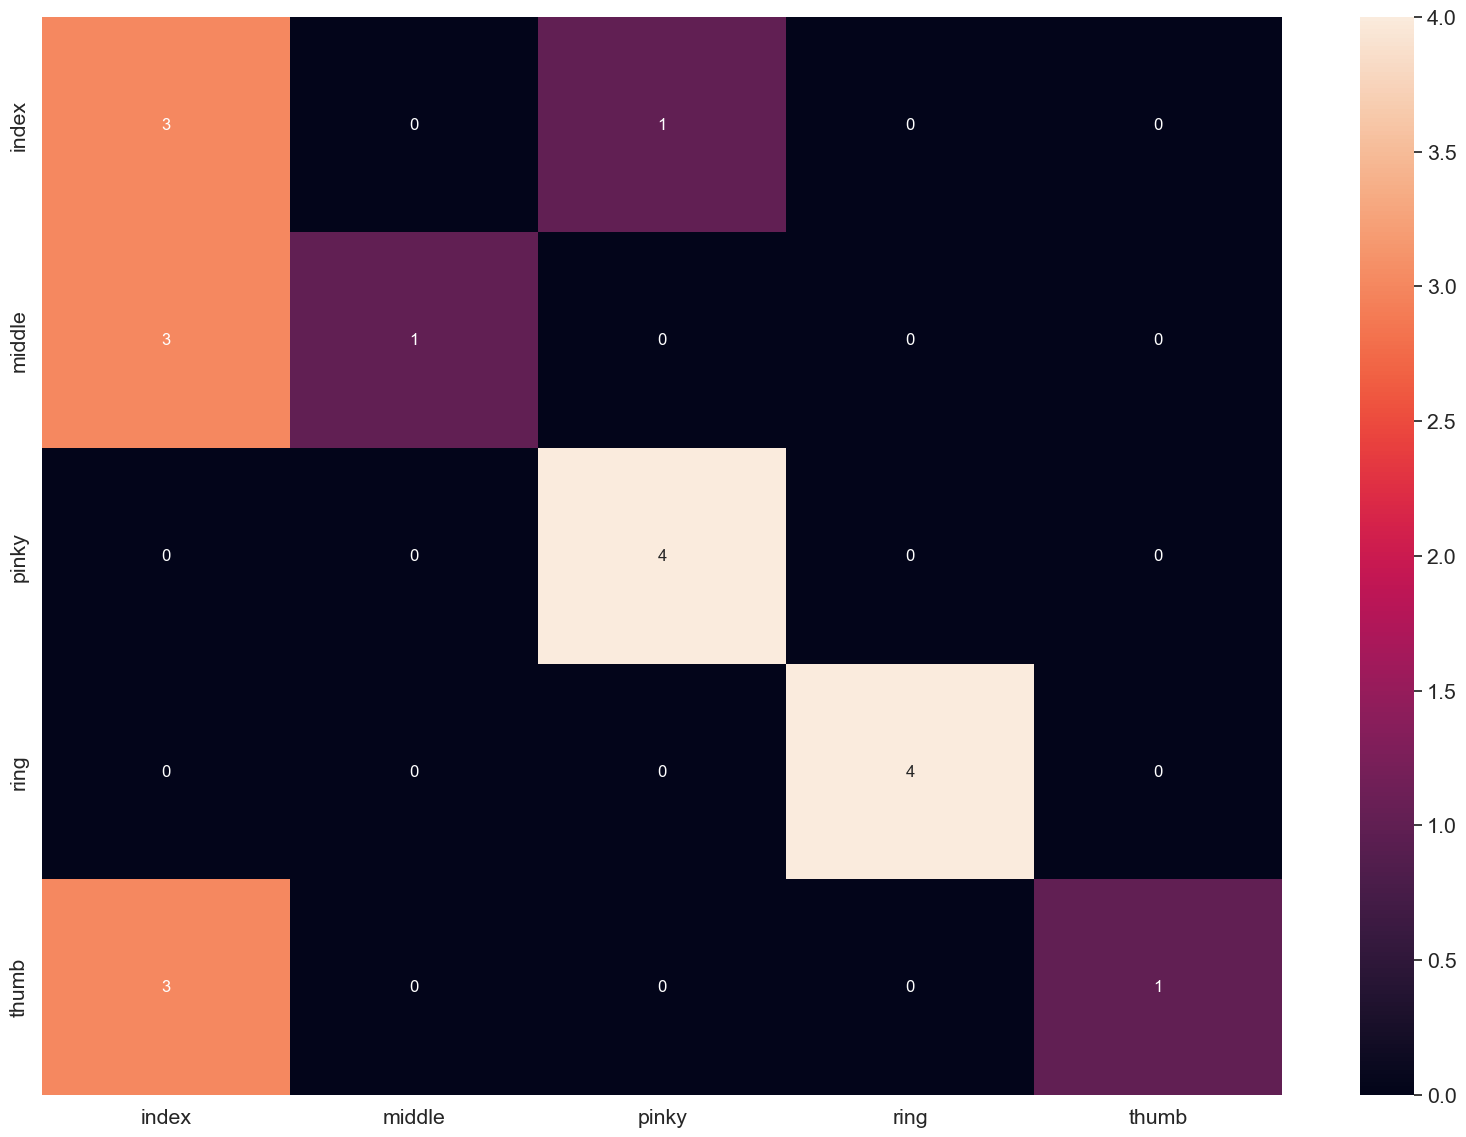

In [88]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_trainval,y_trainval )
predictions = svm_model.predict(x_testval)
metrics(y_testval,predictions)

### RandomForest 

c:\Users\Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users

Accuracy: 0.9
F1 score: 0.8666666666666666
Recall: 0.9
Precision: 0.85

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5

    accuracy                           0.90        10
   macro avg       0.75      0.83      0.78        10
weighted avg       0.85      0.90      0.87        10


 confusion matrix:
 [[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 5]]


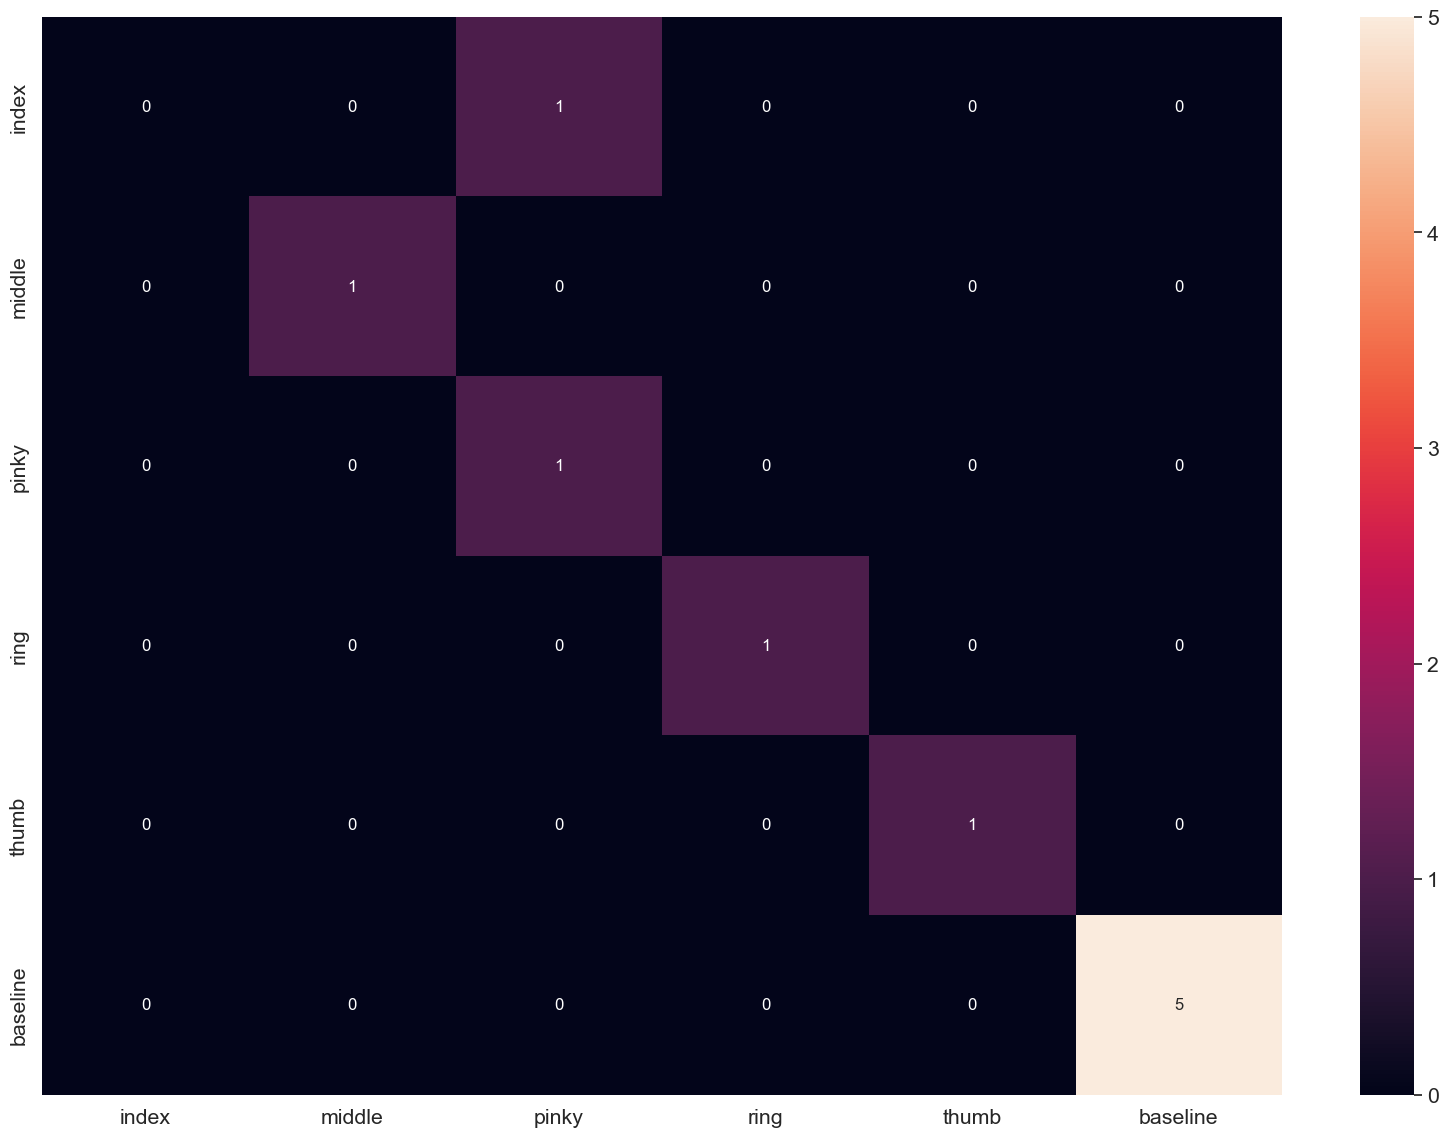

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_trainval, y_trainval)
predictions = rf_model.predict(x_testval)
metrics(y_testval, predictions)

### Convolutional Neural Network

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Extract the input features and target labels
x_train = x_trainval
x_test = x_testval

# Encode the labels to integers
# label_encoder = LabelEncoder()
y_train = y_trainval
y_test = y_testval

# # Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=6)  # Adjust num_classes to the number of unique labels
y_test = to_categorical(y_test, num_classes=6)

# Reshape the data to match the expected input shape of Conv1D (samples, time steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Building the CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_trainval.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                    validation_split=0.2, verbose=1)

# Evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_accuracy}')

# Making predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=label_mapping.keys()))

Epoch 1/20


c:\Users\Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.1749 - loss: 1.8230 - val_accuracy: 0.6111 - val_loss: 1.6799
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4694 - loss: 1.7088 - val_accuracy: 0.6667 - val_loss: 1.5645
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6008 - loss: 1.5659 - val_accuracy: 0.6667 - val_loss: 1.4565
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6385 - loss: 1.5365 - val_accuracy: 0.6667 - val_loss: 1.3504
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6021 - loss: 1.4152 - val_accuracy: 0.6667 - val_loss: 1.2330
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6086 - loss: 1.3390 - val_accuracy: 0.6667 - val_loss: 1.1029
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5975 - loss: 1.2167 - val_accuracy: 0.6667 - val_loss: 0.9724
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6229 - loss: 1.1071 - val_accuracy: 0.6667 - val_loss: 0.8542
Epoch 9/20


c:\Users\Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier